# Supervised Learning–Classification

In ML,
classification deals with identifying the probability a new object is a member of a class
or set. The classifiers are the algorithms that map the input data (also called features) to
categories.


## Logistic Regression









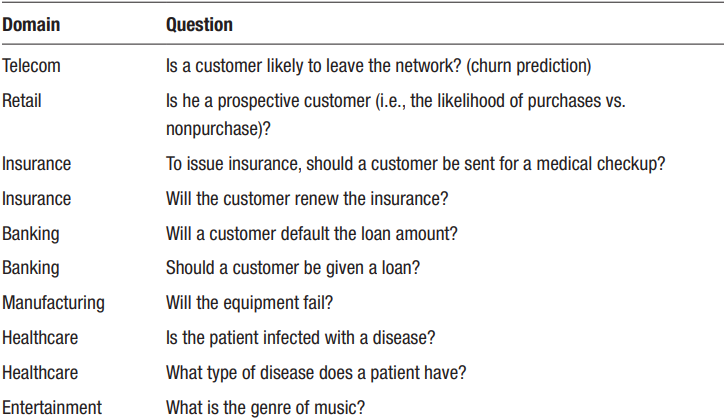

Let’s consider a use case where we have to predict students test outcome: pass (1) or fail
(0) based on hours studied. In this case, the outcome to be predicted is discrete. Let’s
build a linear regression and try to use a threshold: anything over some value is a pass,
else fail

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


   Hours_Studied  Result
0              2       0
1              3       0
2              4       0
3              5       1
4              6       1
5              7       1
6              8       1
7              9       1
8             10       1
R Squared :  0.675
Mean Absolute Error:  0.2296296296296296
Root Mean Squared Error:  0.26874192494328497


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()


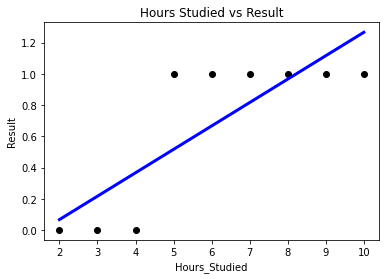

In [ ]:
# Import libraries
import sklearn.linear_model as lm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score , mean_absolute_error, mean_squared_error

# Load data
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Copy of Grade_Set_1_Classification.csv')
print (df)
x= df.Hours_Studied[:, np.newaxis] # independent variable
y= df.Result # dependent variable

# Create linear regression object
lr = lm.LinearRegression()
# Train the model using the training sets
lr.fit(x, y)

# plotting fitted line
plt.scatter(x, y, color='black')
plt.plot(x, lr.predict(x), color='blue', linewidth=3)
plt.title('Hours Studied vs Result')
plt.ylabel('Result')
plt.xlabel('Hours_Studied')

# add predict value to the data frame
df['Result_Pred'] = lr.predict(x)

# Using built-in function
print ("R Squared : ", r2_score(df.Result, df.Result_Pred))
print ("Mean Absolute Error: ", mean_absolute_error(df.Result, df.Result_Pred))
print ("Root Mean Squared Error: ", np.sqrt(mean_squared_error(df.Result,df.Result_Pred)))



### Plot Sigmoid Function


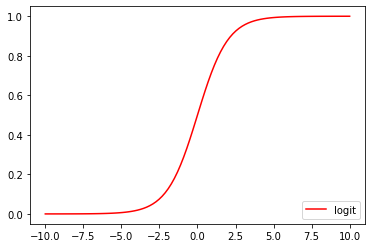

In [ ]:
# plot sigmoid function
x = np.linspace(-10, 10, 100)
y = 1.0 / (1.0 + np.exp(-x))
plt.plot(x, y, 'r-', label='logit')
plt.legend(loc='lower right')

Predicted probability: [0.05368062 0.15313611 0.36565616 0.64757973 0.85417548 0.94916743
 0.98347736 0.99475738 0.99834945]
Predicted Class: [0 0 0 1 1 1 1 1 1]


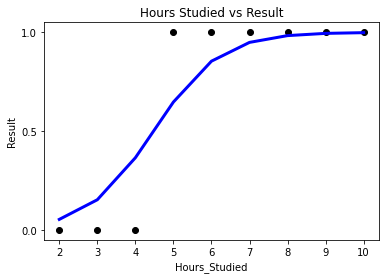

In [ ]:
#7 Logistic Regression Using Scikit-learn
from sklearn.linear_model import LogisticRegression

# manually add intercept
df['intercept'] = 1
independent_variables = ['Hours_Studied', 'intercept']
x = df[independent_variables] # independent variable
y = df['Result'] # dependent variable

# instantiate a logistic regression model, and fit with X and y
model = LogisticRegression()
model = model.fit(x, y)

# check the accuracy on the training set
model.score(x, y)

# predict_proba will return array containing probability of y = 0 and y = 1
print ('Predicted probability:', model.predict_proba(x)[:,1])

# predict will give convert the probability(y=1) values > .5 to 1 else 0
print ('Predicted Class:',model.predict(x))

# plotting fitted line
plt.scatter(df.Hours_Studied, y, color='black')
plt.yticks([0.0, 0.5, 1.0])
plt.plot(df.Hours_Studied, model.predict_proba(x)[:,1], color='blue',
linewidth=3)
plt.title('Hours Studied vs Result')
plt.ylabel('Result')
plt.xlabel('Hours_Studied')
plt.show()


In [ ]:
model.predict_proba(x)


array([[0.94631938, 0.05368062],
       [0.84686389, 0.15313611],
       [0.63434384, 0.36565616],
       [0.35242027, 0.64757973],
       [0.14582452, 0.85417548],
       [0.05083257, 0.94916743],
       [0.01652264, 0.98347736],
       [0.00524262, 0.99475738],
       [0.00165055, 0.99834945]])

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Copy of Grade_Set_1_Classification.csv')
print (df)

   Hours_Studied  Result
0              2       0
1              3       0
2              4       0
3              5       1
4              6       1
5              7       1
6              8       1
7              9       1
8             10       1


### Evaluating a Classification Model Performance
The confusion matrix is the table that is used for describing the performance of the
classification model. Figure below shows the confusion matrix.





 ###                   Confusion matrix

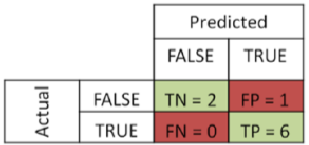


### Classification Pefromance Matrices


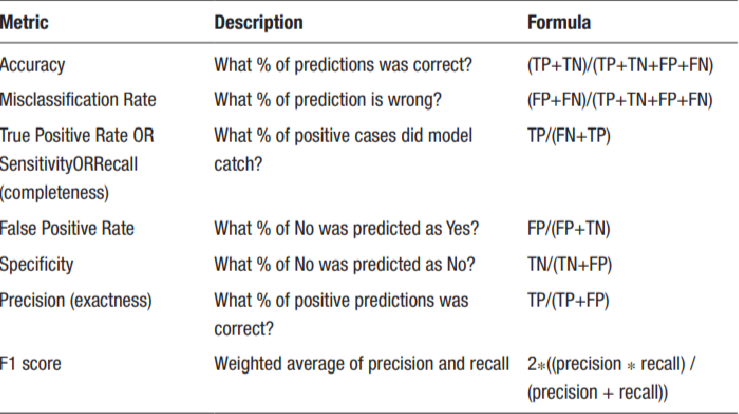

### Confusion Matrix


In [ ]:

from sklearn import metrics
# generate evaluation metrics
print ("Accuracy :", metrics.accuracy_score(y, model.predict(x)))

print ("AUC :", metrics.roc_auc_score(y, model.predict_proba(x)[:,1]))

print ("Confusion matrix :",metrics.confusion_matrix(y, model.predict(x)))

print ("classification report :", metrics.classification_report(y, model.predict(x)))

Accuracy : 1.0
AUC : 1.0
Confusion matrix : [[3 0]
 [0 6]]
classification report :               precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         6

    accuracy                           1.00         9
   macro avg       1.00      1.00      1.00         9
weighted avg       1.00      1.00      1.00         9



### ROC (receiver operating characteristic)curve

ROC AUC: 1.00


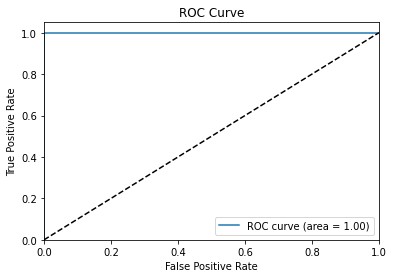

In [ ]:
#Area Under the Curve
# Determine the false positive and true positive rates
fpr, tpr, _ = metrics.roc_curve(y, model.predict_proba(x)[:,1])
# Calculate the AUC
roc_auc = metrics.auc(fpr, tpr)
print ('ROC AUC: %0.2f' % roc_auc)
# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
metrics.roc_curve(y, model.predict_proba(x)[:,1])


(array([0., 0., 0., 1.]),
 array([0.        , 0.16666667, 1.        , 1.        ]),
 array([1.99834945, 0.99834945, 0.64757973, 0.05368062]))

INVERSE REGULARIZATION: This means minimizing the error between what the model predicts for your dependent variable given your data compared to what your dependent variable actually is.

### Fitting Line


C = 1 (default), Accuracy : 1.0
C = 10, Accuracy : 1.0
C = 100, Accuracy : 1.0
C = 1000, Accuracy : 1.0


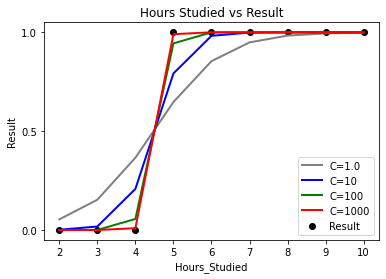

In [ ]:
#Controling Complexity for Fitting a Line
# instantiate a logistic regression model with default c value, and fit with X and y
model = LogisticRegression( )
model = model.fit(x, y)

# check the accuracy on the training set
print ("C = 1 (default), Accuracy :", metrics.accuracy_score(y, model.predict(x)))

# instantiate a logistic regression model with c = 10, and fit with X and y
model1 = LogisticRegression(C=10)
model1 = model1.fit(x, y)

# check the accuracy on the training set
print ("C = 10, Accuracy :", metrics.accuracy_score(y, model1.predict(x)))

# instantiate a logistic regression model with c = 100, and fit with X and y
model2 = LogisticRegression(C=100)
model2 = model2.fit(x, y)

# check the accuracy on the training set
print ("C = 100, Accuracy :", metrics.accuracy_score(y, model2.predict(x)))

# instantiate a logistic regression model with c = 1000, and fit with X and y
model3 = LogisticRegression(C=1000)
model3 = model3.fit(x, y)

# check the accuracy on the training set
print ("C = 1000, Accuracy :", metrics.accuracy_score(y, model3.predict(x)))

# plotting fitted line
plt.scatter(df.Hours_Studied, y, color='black', label='Result')
plt.yticks([0.0, 0.5, 1.0])
plt.plot(df.Hours_Studied, model.predict_proba(x)[:,1], color='gray',
linewidth=2, label='C=1.0')
plt.plot(df.Hours_Studied, model1.predict_proba(x)[:,1], color='blue',
linewidth=2,label='C=10')
plt.plot(df.Hours_Studied, model2.predict_proba(x)[:,1], color='green',
linewidth=2,label='C=100')
plt.plot(df.Hours_Studied, model3.predict_proba(x)[:,1], color='red',
linewidth=2,label='C=1000')
plt.legend(loc='lower right') # legend location
plt.title('Hours Studied vs Result')
plt.ylabel('Result')
plt.xlabel('Hours_Studied')
plt.show()

### Regularization
Underfitting, Right-Fitting, and Overfitting


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.


Train Accuracy for C=0.01:  0.6848484848484848
Test Accuracy for C=0.01:  0.704225352112676
Train Accuracy for C=1:  0.8363636363636363
Test Accuracy for C=1:  0.8028169014084507


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please a

Train Accuracy for C=10000:  0.8545454545454545
Test Accuracy for C=10000:  0.8028169014084507


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.


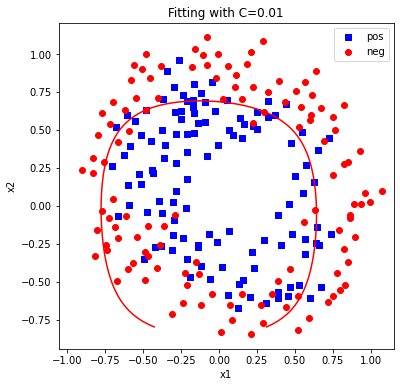

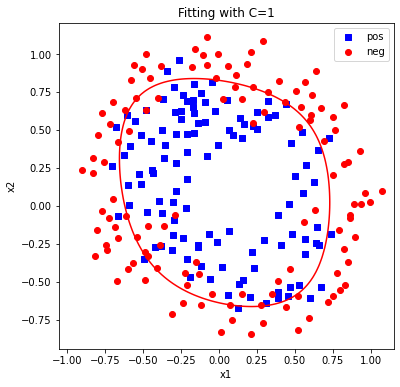

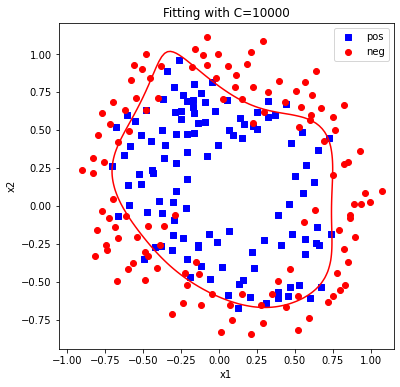

In [ ]:
#Underfitting, Right-Fitting, and Overfitting
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Copy of LR_NonLinear.csv')
pos = data['class'] == 1
neg = data['class'] == 0
x1 = data['x1']
x2 = data['x2']

# function to draw scatter plot between two variables
def draw_plot():
 plt.figure(figsize=(6, 6))
 plt.scatter(np.extract(pos, x1),np.extract(pos, x2),c='b', marker='s', label='pos')

 plt.scatter(np.extract(neg, x1), np.extract(neg, x2), c='r', marker='o', label='neg')
 plt.xlabel('x1');
 plt.ylabel('x2');
 plt.axes().set_aspect('equal', 'datalim')
 plt.legend();

# create hihger order polynomial for independent variables
order_no = 6

# map the variable 1 & 2 to its higher order polynomial
def map_features(variable_1, variable_2, order=order_no):
  assert order >= 1
  def iter():
    for i in range(1, order + 1):
      for j in range(i + 1):
        yield np.power(variable_1, i - j) * np.power(variable_2, j)
  return np.vstack(iter())
out = map_features(data['x1'], data['x2'], order=order_no)
X = out.transpose()
y = data['class']

# split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
random_state=0)

# function to draw classifier line
def draw_boundary(classifier):
  dim = np.linspace(-0.8, 1.1, 100)
  dx, dy = np.meshgrid(dim, dim)
  v = map_features(dx.flatten(), dy.flatten(), order=order_no)
  z = (np.dot(classifier.coef_, v) + classifier.intercept_).reshape(100, 100)
  plt.contour(dx, dy, z, levels=[0], colors=['r'])

# fit with c = 0.01
clf = LogisticRegression(C=0.01).fit(X_train, y_train)
print ('Train Accuracy for C=0.01: ', clf.score(X_train, y_train))
print ('Test Accuracy for C=0.01: ', clf.score(X_test, y_test))
draw_plot()
plt.title('Fitting with C=0.01')
draw_boundary(clf)
plt.legend();

# fit with c = 1
clf = LogisticRegression(C=1).fit(X_train, y_train)
print ('Train Accuracy for C=1: ', clf.score(X_train, y_train))
print ('Test Accuracy for C=1: ', clf.score(X_test, y_test))
draw_plot()
plt.title('Fitting with C=1')
draw_boundary(clf)
plt.legend();

# fit with c = 10000
clf = LogisticRegression(C=10000).fit(X_train, y_train)
print ('Train Accuracy for C=10000: ', clf.score(X_train, y_train))
print ('Test Accuracy for C=10000: ', clf.score(X_test, y_test))
draw_plot()
plt.title('Fitting with C=10000')
draw_boundary(clf)
plt.legend();

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Copy of LR_NonLinear.csv')
data.head()

,x1,x2,class
0,-0.023733,0.62456,1
1,-0.167742,0.60994,1
2,-0.288710,0.61725,1
3,-0.450000,0.42719,1
4,-0.588250,0.39064,1


In [ ]:
order=6
variable_1=data['x1']
variable_2=data['x2']
def iter():
    for i in range(1, order + 1):
      for j in range(i + 1):
        yield np.power(variable_1, i - j) * np.power(variable_2, j)
        return np.vstack(iter())

In [ ]:
out.transpose()

array([[-2.37330000e-02,  6.24560000e-01,  5.63255289e-04, ...,
         8.57041681e-05, -2.25539945e-03,  5.93533175e-02],
       [-1.67742000e-01,  6.09940000e-01,  2.81373786e-02, ...,
         3.89432413e-03, -1.41604611e-02,  5.14899764e-02],
       [-2.88710000e-01,  6.17250000e-01,  8.33534641e-02, ...,
         1.20995174e-02, -2.58682661e-02,  5.53052795e-02],
       ...,
       [-4.84450000e-01,  9.99270000e-01,  2.34691802e-01, ...,
         2.34007252e-01, -4.82684337e-01,  9.95627986e-01],
       [-6.33640000e-03,  9.99270000e-01,  4.01499650e-05, ...,
         4.00328554e-05, -6.31330588e-03,  9.95627986e-01],
       [ 6.32650000e-01, -3.06120000e-02,  4.00246023e-01, ...,
         3.51474517e-07, -1.70067777e-08,  8.22905998e-10]])

### Multiclass Logistic Regression


In [ ]:
# Load Data
from sklearn import datasets
import numpy as np
import pandas as pd
iris = datasets.load_iris()
X = iris.data
y = iris.target
print('Class labels:', np.unique(y))


Class labels: [0 1 2]


#### Normalize Data
The unit of measurement might differ, so let’s normalize the data before building the
model

In [ ]:
# Normalize Data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X)
X = sc.transform(X)


### Split Data
Split data into train and test. Whenever we are using a random function, it’s advised to
use a seed to ensure the reproducibility of the results

In [ ]:
# split data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
random_state=0)

In [ ]:
# Logistic Regression Model Training and Evaluation
from sklearn.linear_model import LogisticRegression

# l1 regularization gives better results
lr = LogisticRegression(penalty='l1', C=10, random_state=0,solver='liblinear')
lr.fit(X_train, y_train)
from sklearn import metrics

# generate evaluation metrics
print("Train - Accuracy :", metrics.accuracy_score(y_train, lr.predict
(X_train)))
print("Train - Confusion matrix :",metrics.confusion_matrix(y_train,
lr.predict(X_train)))
print("Train - classification report :", metrics.classification_report
(y_train, lr.predict(X_train)))
print("Test - Accuracy :", metrics.accuracy_score(y_test, lr.predict
(X_test)))
print("Test - Confusion matrix :",metrics.confusion_matrix(y_test,
lr.predict(X_test)))
print("Test - classification report :", metrics.classification_report
(y_test, lr.predict(X_test)))

Train - Accuracy : 0.9809523809523809
Train - Confusion matrix : [[34  0  0]
 [ 0 30  2]
 [ 0  0 39]]
Train - classification report :               precision    recall  f1-score   support

           0       1.00      1.00      1.00        34
           1       1.00      0.94      0.97        32
           2       0.95      1.00      0.97        39

    accuracy                           0.98       105
   macro avg       0.98      0.98      0.98       105
weighted avg       0.98      0.98      0.98       105

Test - Accuracy : 0.9777777777777777
Test - Confusion matrix : [[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]
Test - classification report :               precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.94      0.97        18
           2       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98     

### Generalized Linear Models
Generalized linear model (GLM) was an effort by John Nelder and Robert Wedderburn
to unify commonly used various statistical models such as linear, logistic, Poisson, etc. 

### Different GLM Distribution Family

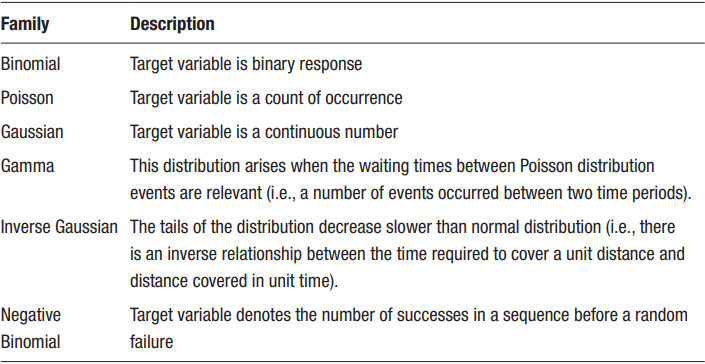

In [ ]:
# Generalized Linear Model
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Copy of Grade_Set_1.csv')
print('####### Linear Regression Model ########')

# Create linear regression object
lr = lm.LinearRegression()
x= df.Hours_Studied[:, np.newaxis] # independent variable
y= df.Test_Grade.values # dependent variable

# Train the model using the training sets
lr.fit(x, y)
print ("Intercept: ", lr.intercept_)
print ("Coefficient: ", lr.coef_)
print('\n####### Generalized Linear Model ########')
import statsmodels.api as sm

# To be able to run GLM, we'll have to add the intercept constant to x variable
x = sm.add_constant(x, prepend=False)

# Instantiate a gaussian family model with the default link function.
model = sm.GLM(y, x, family = sm.families.Gaussian())
model = model.fit()
print (model.summary())

####### Linear Regression Model ########
Intercept:  49.67777777777776
Coefficient:  [5.01666667]

####### Generalized Linear Model ########
                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                    9
Model:                            GLM   Df Residuals:                        7
Model Family:                Gaussian   Df Model:                            1
Link Function:               identity   Scale:                          5.3627
Method:                          IRLS   Log-Likelihood:                -19.197
Date:                Thu, 07 Jul 2022   Deviance:                       37.539
Time:                        09:25:29   Pearson chi2:                     37.5
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  import sys
